<a href="https://colab.research.google.com/github/sathwikap03/hotel_bookings/blob/main/Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("/content/hotel_bookings.csv")

# Preview the data
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Check missing values
df.isnull().sum()

# Fill missing 'children' with 0 (assuming no children if blank)
df['children'] = df['children'].fillna(0)

# Fill missing 'agent' and 'company' with 0 or 'Unknown'
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['country'] = df['country'].fillna('Unknown')



In [ ]:
# Convert month name to month number
df['arrival_date_month_num'] = pd.to_datetime(
    df['arrival_date_month'], format='%B'
).dt.month

# Ensure year, month, day are integers
df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['arrival_date_month_num'] = df['arrival_date_month_num'].astype(int)
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype(int)

# Build proper datetime
df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'],
    month=df['arrival_date_month_num'],
    day=df['arrival_date_day_of_month']
))

# Drop helper column if not needed
df = df.drop(columns=['arrival_date_month_num'])


In [ ]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 31994


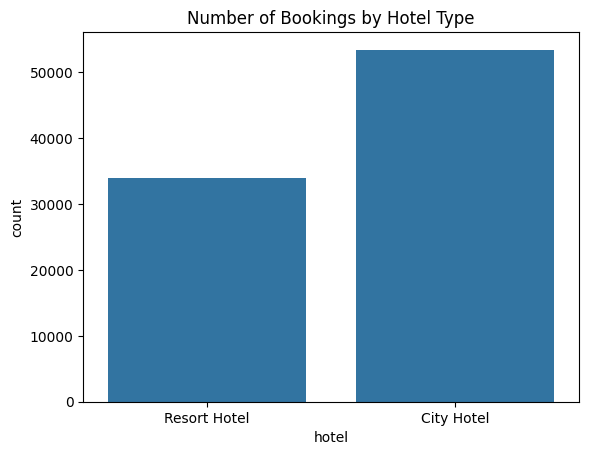

In [ ]:
sns.countplot(x='hotel', data=df)
plt.title("Number of Bookings by Hotel Type")
plt.show()


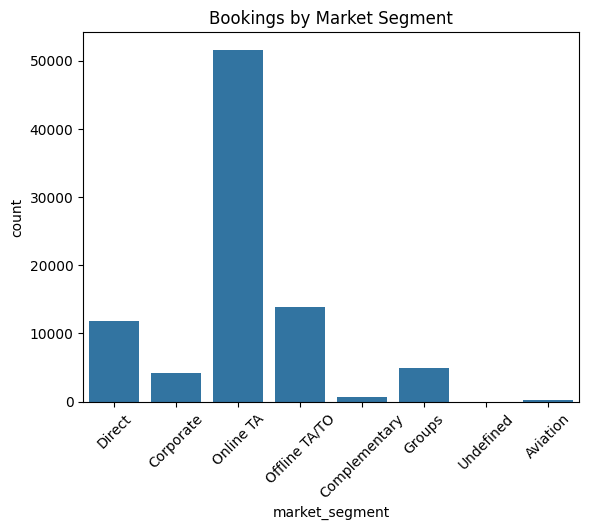

In [ ]:
sns.countplot(x='market_segment', data=df)
plt.xticks(rotation=45)
plt.title("Bookings by Market Segment")
plt.show()


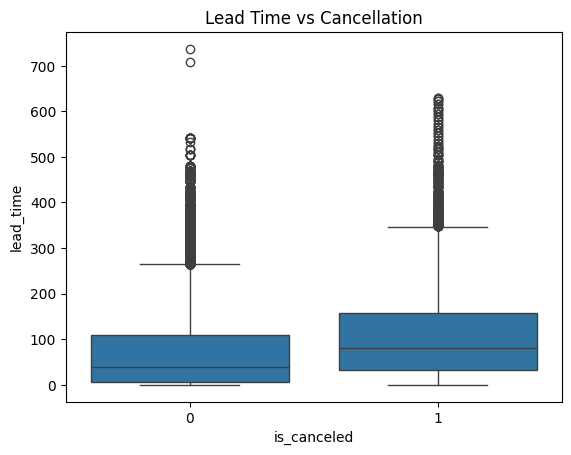

In [ ]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()


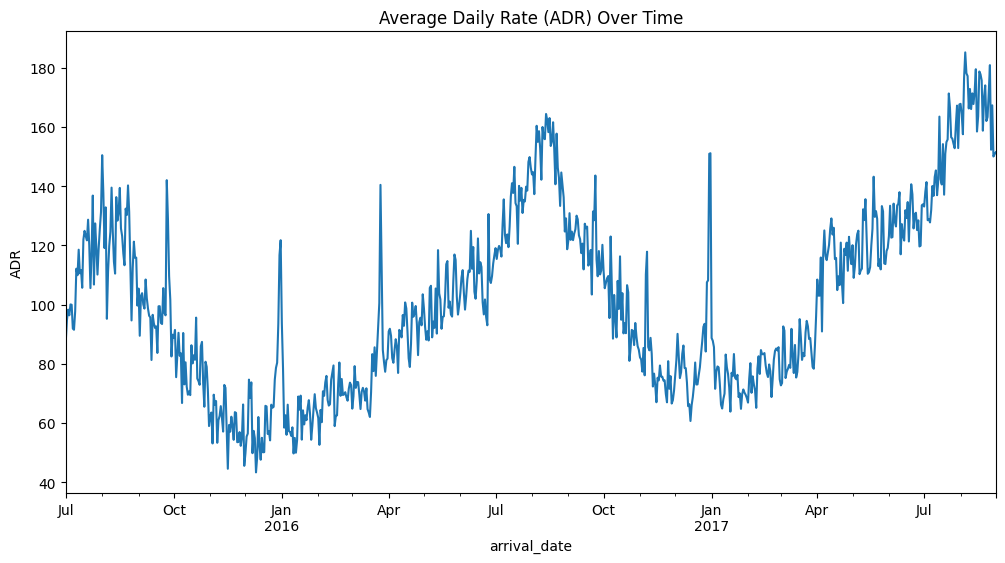

In [ ]:
# Average ADR per month
adr_trend = df.groupby('arrival_date')['adr'].mean()
adr_trend.plot(figsize=(12,6))
plt.title("Average Daily Rate (ADR) Over Time")
plt.ylabel("ADR")
plt.show()


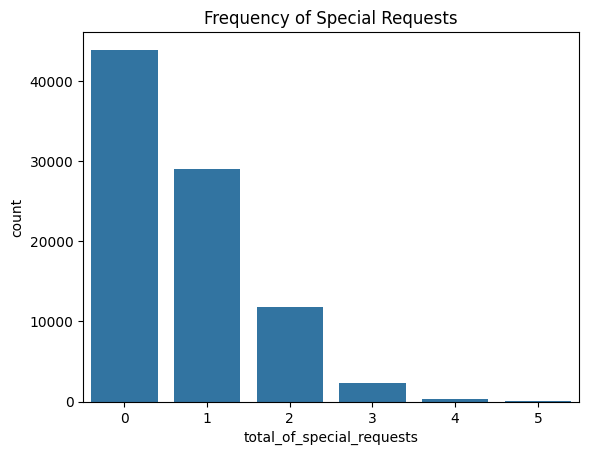

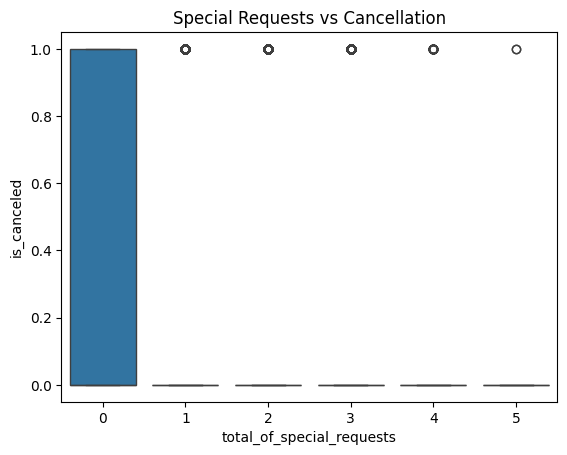

In [ ]:
sns.countplot(x='total_of_special_requests', data=df)
plt.title("Frequency of Special Requests")
plt.show()

# Impact on cancellation
sns.boxplot(x='total_of_special_requests', y='is_canceled', data=df)
plt.title("Special Requests vs Cancellation")
plt.show()


In [ ]:
average_lead_time = df['lead_time'].mean()
print(f"Average Lead Time: {average_lead_time:.2f} days")


Average Lead Time: 79.89 days


In [ ]:
bookings_by_hotel = df['hotel'].value_counts()
print(bookings_by_hotel)


hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64


In [ ]:
canceled_bookings = df['is_canceled'].sum()
print(f"Total Canceled Bookings: {canceled_bookings}")


Total Canceled Bookings: 24025


In [ ]:
most_common_month = df['arrival_date_month'].mode()[0]
print(f"Most Common Arrival Month (numeric): {most_common_month}")


Most Common Arrival Month (numeric): August


In [ ]:
average_requests = df['total_of_special_requests'].mean()
print(f"Average Special Requests per Booking: {average_requests:.2f}")


Average Special Requests per Booking: 0.70


In [ ]:
top_country = df['country'].value_counts().idxmax()
print(f"Country with Most Bookings: {top_country}")


Country with Most Bookings: PRT


In [ ]:
adr_by_hotel = df.groupby('hotel')['adr'].mean()
print(adr_by_hotel)


hotel
City Hotel      110.985944
Resort Hotel     99.025346
Name: adr, dtype: float64


In [ ]:
parking_percentage = (df[df['required_car_parking_spaces'] > 0].shape[0] / df.shape[0]) * 100
print(f"Percentage Requiring Parking: {parking_percentage:.2f}%")


Percentage Requiring Parking: 8.37%


In [ ]:
avg_weekend_nights = df['stays_in_weekend_nights'].mean()
avg_week_nights = df['stays_in_week_nights'].mean()
print(f"Average Weekend Nights: {avg_weekend_nights:.2f}, Average Week Nights: {avg_week_nights:.2f}")


Average Weekend Nights: 1.01, Average Week Nights: 2.63


In [ ]:
travel_agent_bookings = df[df['agent'] != 0].shape[0]
print(f"Bookings through Travel Agents: {travel_agent_bookings}")


Bookings through Travel Agents: 75203


hotel
City Hotel      30.038557
Resort Hotel    23.480923
Name: is_canceled, dtype: float64


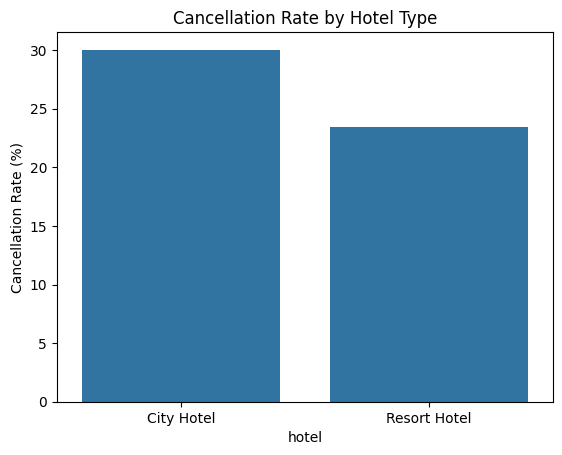

In [ ]:
cancellation_rate = df.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_rate)

# Visualization
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values)
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Hotel Type")
plt.show()


market_segment
Aviation         100.170396
Complementary      3.049245
Corporate         68.151246
Direct           116.579429
Groups            74.864284
Offline TA/TO     81.764191
Online TA        118.171606
Undefined         15.000000
Name: adr, dtype: float64


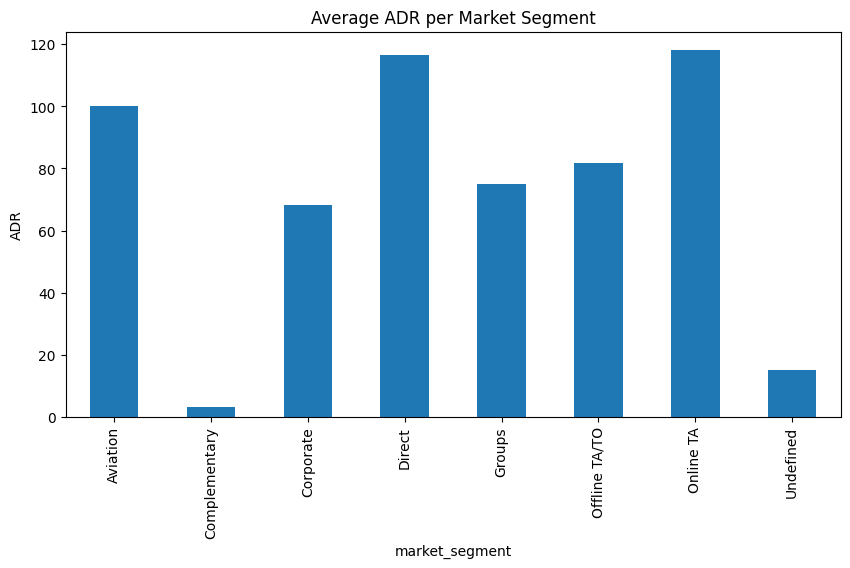

In [ ]:
adr_market_segment = df.groupby('market_segment')['adr'].mean()
print(adr_market_segment)

# Visualization
adr_market_segment.plot(kind='bar', figsize=(10,5), title='Average ADR per Market Segment')
plt.ylabel('ADR')
plt.show()


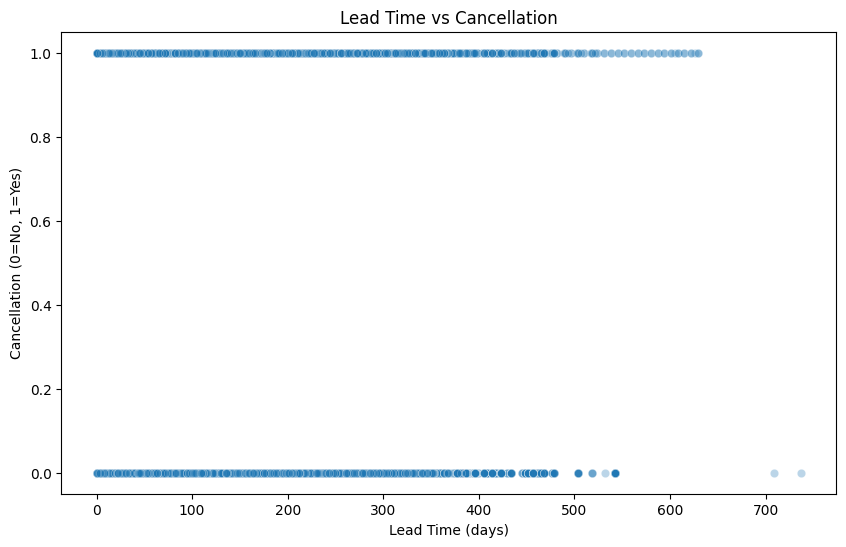

Correlation between lead time and cancellation: 0.18


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='lead_time', y='is_canceled', data=df, alpha=0.3)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Cancellation (0=No, 1=Yes)")
plt.show()

# Optional: Correlation coefficient
correlation = df['lead_time'].corr(df['is_canceled'])
print(f"Correlation between lead time and cancellation: {correlation:.2f}")


distribution_channel
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64


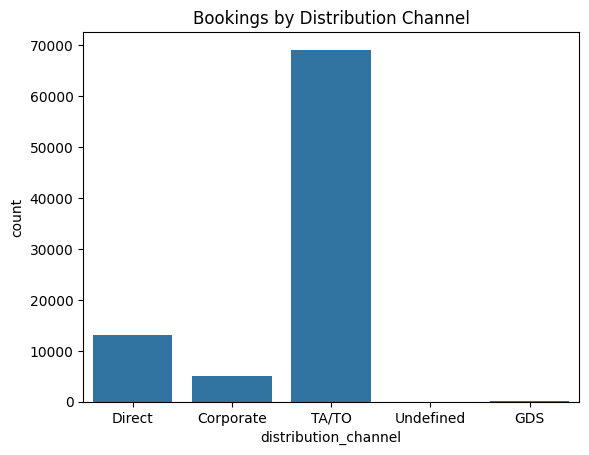

In [ ]:
distribution_channel_count = df['distribution_channel'].value_counts()
print(distribution_channel_count)

# Visualization
sns.countplot(x='distribution_channel', data=df)
plt.title("Bookings by Distribution Channel")
plt.show()


hotel
City Hotel      0.035768
Resort Hotel    0.021991
Name: previous_cancellations, dtype: float64


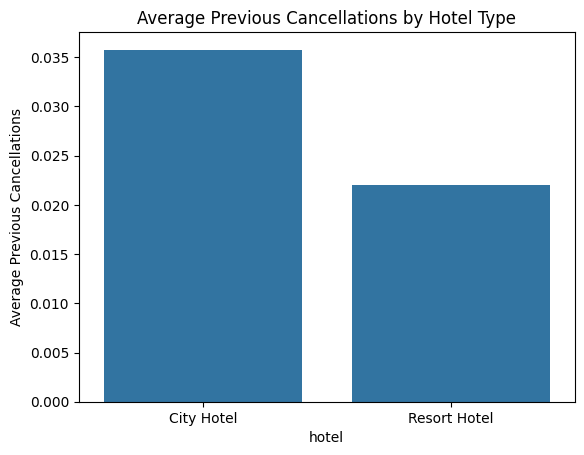

In [ ]:
prev_cancellations = df.groupby('hotel')['previous_cancellations'].mean()
print(prev_cancellations)

sns.barplot(x=prev_cancellations.index, y=prev_cancellations.values)
plt.title("Average Previous Cancellations by Hotel Type")
plt.ylabel("Average Previous Cancellations")
plt.show()


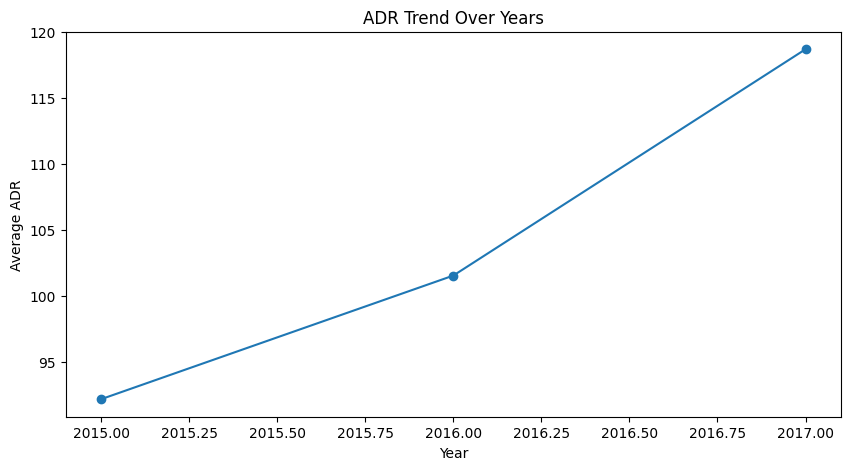

In [ ]:
adr_trend_year = df.groupby('arrival_date_year')['adr'].mean()
adr_trend_year.plot(kind='line', marker='o', figsize=(10,5), title='ADR Trend Over Years')
plt.ylabel("Average ADR")
plt.xlabel("Year")
plt.show()


arrival_date_month
April         819368.35
August       1698412.48
December      417921.11
February      455472.02
January       328748.13
July         1363146.03
June          929859.68
March         613132.35
May           929040.10
November      363408.53
October       625117.56
September     749823.65
Name: adr, dtype: float64


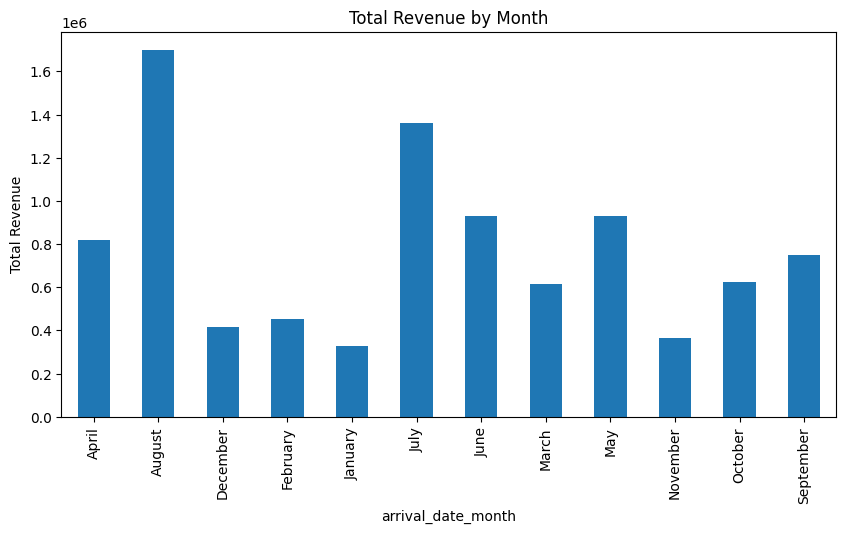

In [ ]:
# Total revenue per month
revenue_per_month = df.groupby('arrival_date_month')['adr'].sum()
print(revenue_per_month)

# Visualization
revenue_per_month.sort_index().plot(kind='bar', figsize=(10,5), title='Total Revenue by Month')
plt.ylabel("Total Revenue")
plt.show()


total_of_special_requests
0     99.665633
1    109.651497
2    118.570312
3    125.070790
4    131.088687
5    129.980000
Name: adr, dtype: float64


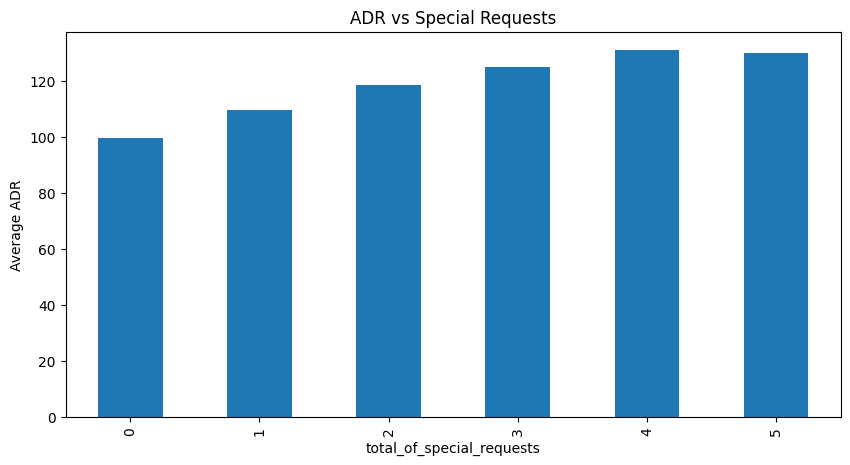

In [ ]:
special_requests_adr = df.groupby('total_of_special_requests')['adr'].mean()
print(special_requests_adr)

special_requests_adr.plot(kind='bar', figsize=(10,5), title='ADR vs Special Requests')
plt.ylabel("Average ADR")
plt.show()


is_repeated_guest
0    3.699932
1    1.927086
Name: total_stay, dtype: float64


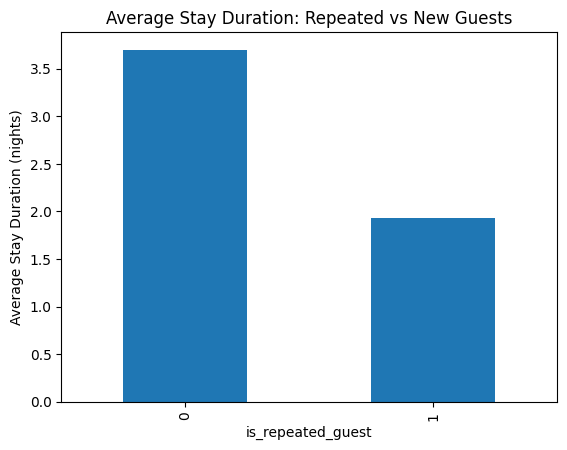

In [ ]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

stay_duration = df.groupby('is_repeated_guest')['total_stay'].mean()
print(stay_duration)

# Visualization
stay_duration.plot(kind='bar', title="Average Stay Duration: Repeated vs New Guests")
plt.ylabel("Average Stay Duration (nights)")
plt.show()


reserved_room_type
A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: count, dtype: int64


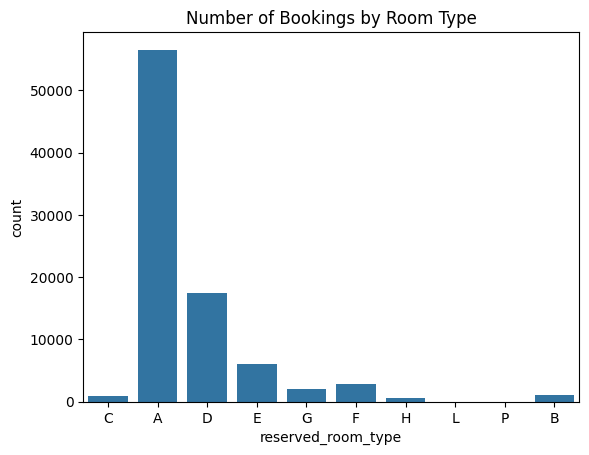

In [ ]:
room_type_count = df['reserved_room_type'].value_counts()
print(room_type_count)

sns.countplot(x='reserved_room_type', data=df)
plt.title("Number of Bookings by Room Type")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select relevant features
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies', 'booking_changes', 'total_of_special_requests']
X = df[features]
y = df['is_canceled']

# Fill any remaining missing values
X = X.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print(coefficients)

# Predictions & report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



                     Feature  Coefficient
0                  lead_time     0.004440
1    stays_in_weekend_nights     0.003507
2       stays_in_week_nights     0.033337
3                     adults     0.357508
4                   children     0.343073
5                     babies     0.002157
6            booking_changes    -0.489121
7  total_of_special_requests    -0.427267
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     12733
           1       0.56      0.11      0.19      4747

    accuracy                           0.74     17480
   macro avg       0.65      0.54      0.52     17480
weighted avg       0.70      0.74      0.66     17480



In [ ]:
from sklearn.linear_model import LinearRegression

X_adr = df[['adults', 'children', 'babies']]
y_adr = df['adr']

# Linear regression
lr_model = LinearRegression()
lr_model.fit(X_adr, y_adr)

coeff_df = pd.DataFrame({'Feature': X_adr.columns, 'Coefficient': lr_model.coef_})
print(coeff_df)


    Feature  Coefficient
0    adults    21.177779
1  children    38.657298
2    babies     6.708070


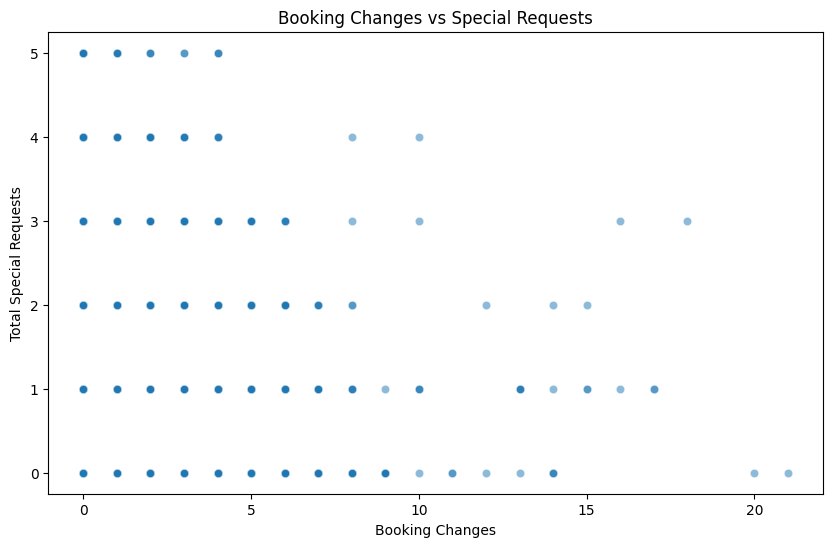

Correlation: 0.02


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='booking_changes', y='total_of_special_requests', data=df, alpha=0.5)
plt.title("Booking Changes vs Special Requests")
plt.xlabel("Booking Changes")
plt.ylabel("Total Special Requests")
plt.show()

# Optional: Correlation
correlation = df['booking_changes'].corr(df['total_of_special_requests'])
print(f"Correlation: {correlation:.2f}")


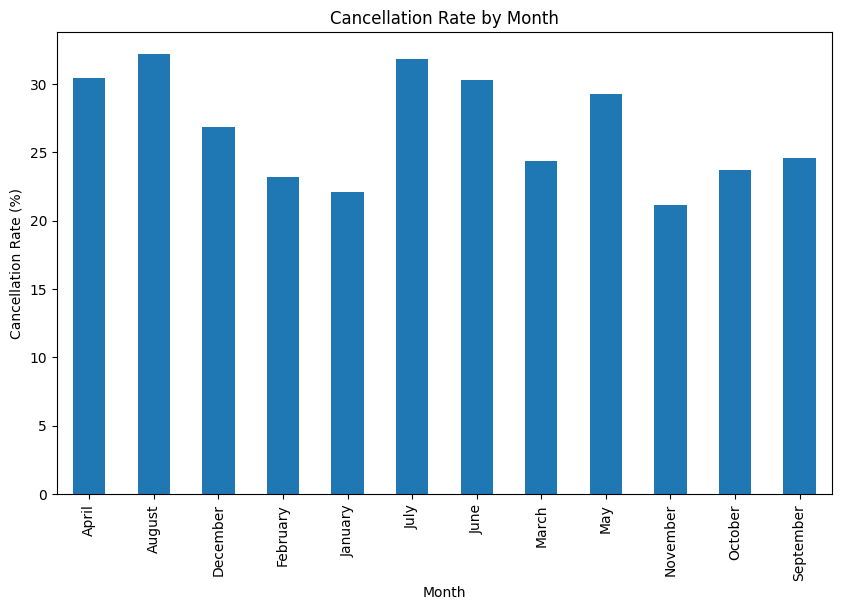

In [ ]:
# Calculate cancellation rate per month
cancellation_by_month = df.groupby('arrival_date_month')['is_canceled'].mean() * 100

# Visualize
cancellation_by_month.sort_index().plot(kind='bar', figsize=(10,6))
plt.title("Cancellation Rate by Month")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Month")
plt.show()


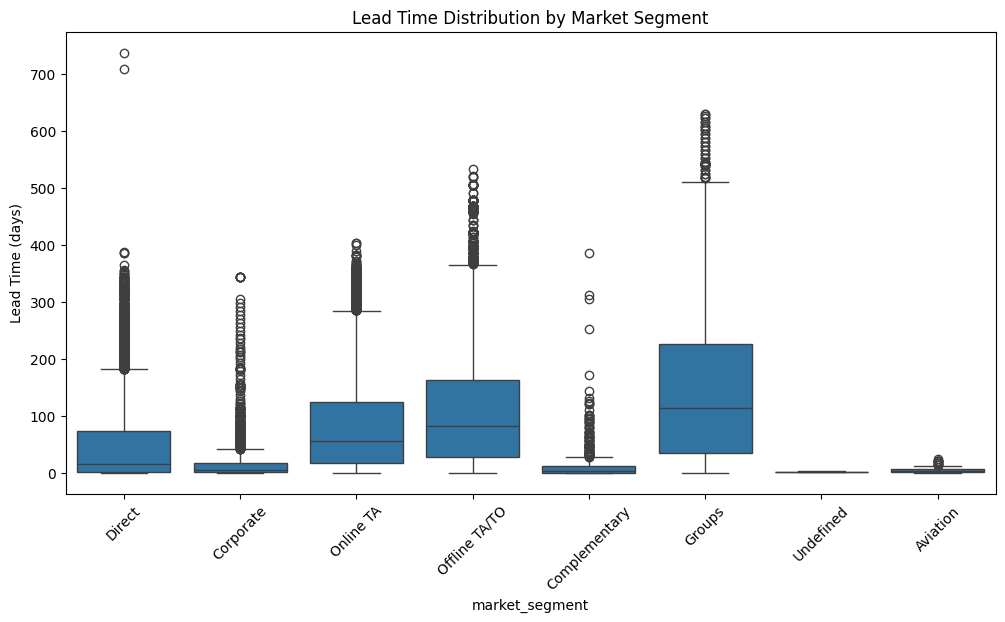

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.xticks(rotation=45)
plt.title("Lead Time Distribution by Market Segment")
plt.ylabel("Lead Time (days)")
plt.show()


In [ ]:
df.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.to_csv('/content/cleaned_hotel_booking_data.csv', index=False)